# Decision Tree

참고 : https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

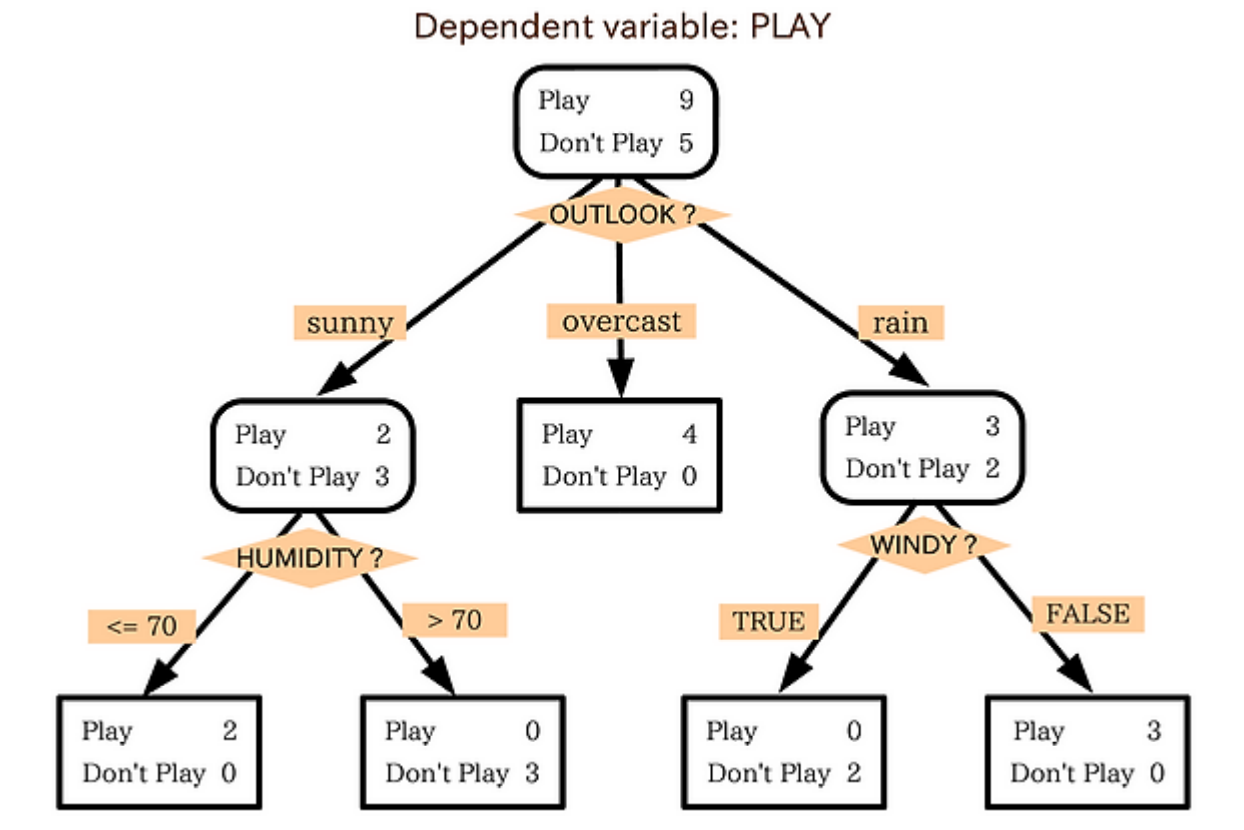

전체 경기 기록 --> Sunny
            --> Overcast
            --> rain

이런식으로 분류해서 만듬. 한 번의 분기때마다 변수 영역을 두 개로 구분하는 모델

분류와 회귀 모두 가능하다.

 - 분류 : 날씨 맑고 습도가 70이상 -> 경기가 열림
 
 - 회귀 : 예측을 하긴 하는데, 예측할 수 있는 결과의 수 = 터미널 노드의 수(맨 끝 노드)
 그래서 데이터가 100000개가 주어져도 3개의 답만 출력함..
 

## 불순도/불확실성

분기 때마다 변수 영역을 두 개로 나누는데, 어떤 기준으로 나누나?

### 기준
순도(homogeneity)가 증가
불순도(impurity) & 불확실성(uncertainty)가 감소하는 방향으로 나눈다.

정보 획득 : 순도가 증가/불확실성이 감소하는 현상

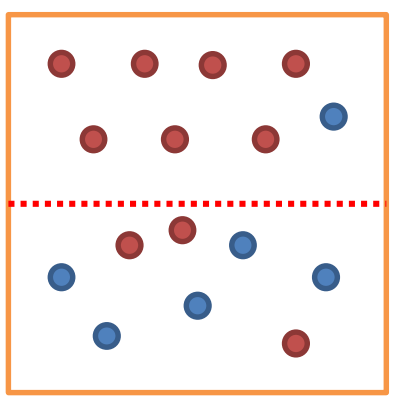



### 엔트로피

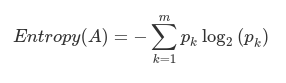

Pk=A 영역에 속하는 것 중에 K  범주에 속하는 비율
빨간색 10/16
파란색 6/16



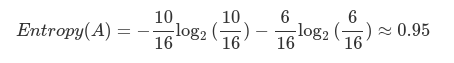
빨간 점선으로 나눈 후의 엔트로피를 구해보면


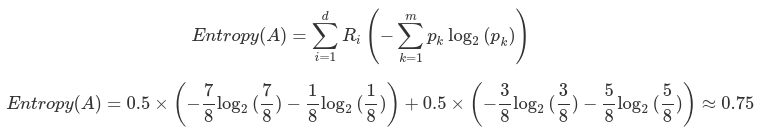

0.95 --> 0.7

0.2만큼 엔트로피가 감소했다 --> 불확실성이 감소했다, 순도가 증가했다, 정보를 획득했다.
## 최대한 엔트로피가 감소하는 방향으로 학습을 진행한다.

범주가 둘 뿐이고, 해당 개체의 수가 동일하게 반반 섞여있으면(불확실성 최대, 순도 최소) 엔트로피 =1   -->직접 계산해보기

## 모델을 학습하는 과정

1. 재귀적 분기
2. 가지치기


 ### 1. 재귀적 분기
 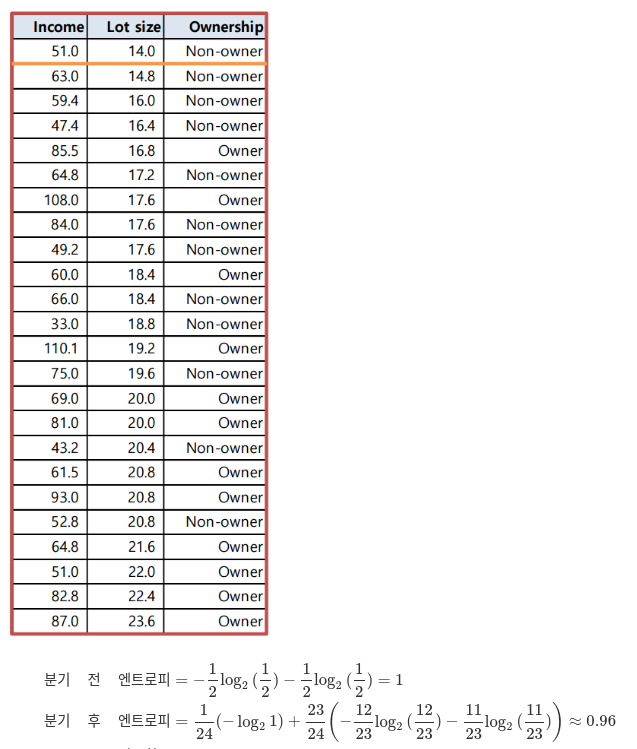

24개 가정
Feature : 소득, 주택크기
target : 잔디깎기 기계 구입 여부

- 1-1. 한 변수 기준(주택 크기)로 정렬
- 1-2. 모든 분기점에 대해 엔트로피를 구해 정보획득을 조사.
- 분기전 :1 분기후 0.96 --> 0.4 정보획득
- 1-3 다른 변수(소득)을 기준으로 정렬하여 1-2 반복.
- 1-4 정보획득이 가장 큰 변수와 그 지점을 선택하여 첫번째 분기로 결정.
- 1-5 분기를 계속해 나감...

그럼 총 몇번을 계산해야 하나? ==> 개체가 n개, 변수가 d개일 때
d(n-1)번.

### 2. 가지치기(pruning)

- terminal node의 순도가 100%인 상태를 Full Tree라고 하는데, 적절한 수준에서 terminal node를 결합해야해. Overfitting을 방지하기 위해!

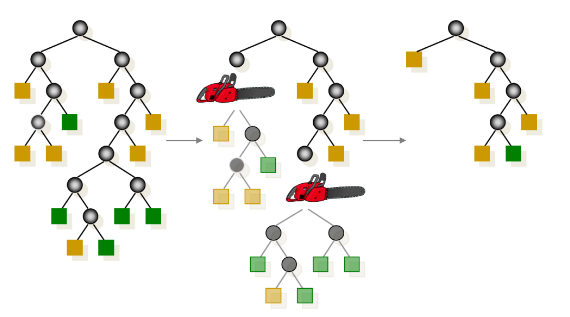

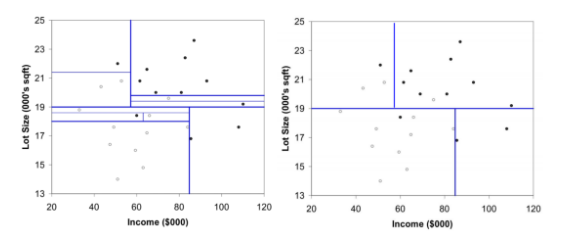

 - 왼쪽이 Full Tree, 오른쪽이 가지치기를 한 결과.
 
 - 왼쪽 : Terminal node의 불순도가 0. 하지만 Terminal node가 너무 많으면 새로운 데이터에 대한 일반화(generalization)능력이 매우 떨어질 수 있음.
 - 오른쪽 : 적절하게 가지치기를 한 결과

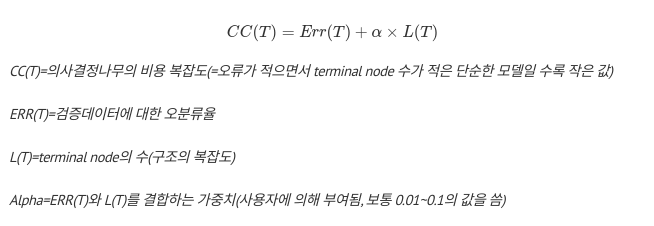

### 가지치기를 하는 기준
 - Cost function을 계산하여 비용함수를 최소로 하는 분기를 찾아내도록 학습.

# 군중은 똑독하다 - Random Forest

참고 :  
1. https://ratsgo.github.io/machine%20learning/2017/03/17/treeensemble/
2. https://medium.com/@deepvalidation/title-3b0e263605de
 
 - Random forest = 의사결정나무 여러개를 동시에 적용해 학습성능을 높이는 앙상블 기법.
앙상블(ensemble) 기법 : 동일한 알고리즘을 여러번 적용하는거.

건강 위험도를 분류하는 Data , 
1번 Tree  , Feature : 흡연, 나이, 다이어트
1번 tree만 사용할 경우, 요소가 너무 적다.

더 많은 요소를 고려해야 함! ex) 성별, 키, 몸무게, 거주지역, 운동량 등등...

2번 트리 : 성별, 키, 몸무게
3번 트리 : 거주지역, 운동량 등.
(통계적으로는 독립 조건을 만들어 주기 위함)
.
.
.


여러 Tree들이 모여서 Forest 가 됐다. 이제 의견을 통합해서 결론을 도출해야 하는데,

투표를 통해 결론을 도출.
1000개의 트리중, 700개가 위험하다고 투표 ===> 다수결의 원칙에 따라 위험

Random의 의미는? : 트리를 만드는 Feature를 고를 때, 무작위(random)으로 Feature를 고른다느 뜻.

### Random Forest가 완성되는 과정
 1. 30개의 요소중 일부만 무작위로 선택(흡연, 키, 몸무게)
 2. 3가지 요소 중 건강 위험도를 가장 잘 예측하는 요소를 고름. 만약 흡연이라면, 첫번째 트리의 노드는 흡연.
 3. 1~2를 통해 의사결정 트리를 완성. 1개의 트리가 생성됐음
 4. 3을 원하는 개수만큼 만듬.==> 숲을 만듬(모델아 완성됐음)
 5. Test 데이터가 주어졌을 때, 다수결의 원칙으로 예측




### 의사결정 트리를 만드는데 Feature를 한번에 다 고려하지 않는 이유?

- 역설적으로 모든 요소를 고려하기 위함.
